In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

* **1.Load data from digitData2.csv" file. The last column of each file presents the label and rest of the columns are features.**

In [2]:
df = pd.read_csv('digitData2.csv')

In [3]:
df.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,5.000000000000000000e+00,1.300000000000000000e+01,9.000000000000000000e+00,1.000000000000000000e+00,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,...,0.000000000000000000e+00.23,0.000000000000000000e+00.24,0.000000000000000000e+00.25,6.000000000000000000e+00,1.300000000000000000e+01.2,1.000000000000000000e+01.2,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29
0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
1,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
2,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
3,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
4,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5.0


* **2.Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.**

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Standardize the dataset
scaler = MinMaxScaler()
scaler.fit(df)
df_transformed = pd.DataFrame(scaler.transform(df))

#Extract the features and labels from the dataset
features = df_transformed.iloc[:,:-1]
labels = df.iloc[:,-1]

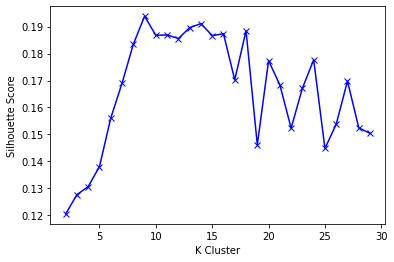

In [6]:
#Choosing a range of cluster from 2 to 30
clusters = np.arange(2, 30)
silhouette = []

#Getting the silhoutte score for each value of K
for cluster in clusters :
    model = KMeans(n_clusters=cluster)
    model.fit(features, labels)
    label = model.labels_
    silhouette.append(silhouette_score(features, label))
    
#Plot the silhoutte scores    
plt.plot(clusters,silhouette,'bx-')
plt.xlabel('K Cluster') 
plt.ylabel('Silhouette Score') 
plt.show()

With K = 9, silhoutte has the highest score.

* **3.Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.**

In [7]:
#Build cluster using Kmeans with K = 9

km_model = KMeans(n_clusters=9)
km_model.fit(features, labels)
km_predict = km_model.predict(features)
print('KMean Shilhoutte Score: ', silhouette_score(features, km_model.labels_))


KMean Shilhoutte Score:  0.19387825582225313


In [8]:
#Build cluster using Kmeans++with K = 9

kmpp_model = KMeans(n_clusters=9, init='k-means++')
kmpp_model.fit(features, labels)
kmpp_predict = kmpp_model.predict(features)

print('KMean++ Silhoutte Score: ', silhouette_score(features, kmpp_model.labels_))

KMean++ Silhoutte Score:  0.19381962565839583


As we can see that the shilhouette score for both KMeans and KMeans++ are pretty the same. Let's look at other scores:

In [9]:
from sklearn import metrics

#Purity Score function get from the Unit Website
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

print("Purity_score of KMeans Model: %0.3f" % purity_score(labels, km_predict))
print("Purity_score of KMeans++ Model: %0.3f" % purity_score(labels, kmpp_predict))

Purity_score of KMeans Model: 0.738
Purity_score of KMeans++ Model: 0.738


Purity scores of both KMeans and Kmeans++ are pretty the same

* **4.Now repeat clustering using Kmeans for 50 times and report the average performance. Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).**

In [24]:
km_silhouette = []
for i in range (50):
    km_model = KMeans(n_clusters=9)
    km_model.fit(features, labels)
    label = km_model.labels_
    km_silhouette.append(silhouette_score(features, label))
    
print('KMeans Silhouette average score: ', sum(km_silhouette)/50)

KMeans Silhouette average score:  0.19383563808618515


In [27]:
kmpp_silhouette = []
for i in range (50):
    kmpp_model = KMeans(n_clusters=9, init='k-means++')
    kmpp_model.fit(features,labels )
    label = kmpp_model.labels_
    kmpp_silhouette.append(silhouette_score(features, label))

print('KMeans++ Silhouette average score: ' ,sum(kmpp_silhouette)/50)

KMeans++ Silhouette average score:  0.19383393581243893


KMeans++ silhouette scores are still pretty the same. There is no big difference between the 2 of them.